In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_d2 = pd.read_csv('/Users/tomaymerich/code/tomaymerich14/resto-project/raw_data/df_dBourse.csv')
df_d16 =pd.read_csv('/Users/tomaymerich/code/tomaymerich14/resto-project/raw_data/df_DXVI.csv')

In [3]:
df_d2 = df_d2.drop(columns=['CA_HT', 'TVA'])

In [4]:
df_d16 = df_d16.drop(columns=['CA_HT', 'TVA'])

(array([ 39., 120., 199., 117.,  91.,  99.,  77.,  39.,  11.,   5.]),
 array([  740.5 ,  1852.45,  2964.4 ,  4076.35,  5188.3 ,  6300.25,
         7412.2 ,  8524.15,  9636.1 , 10748.05, 11860.  ]),
 <BarContainer object of 10 artists>)

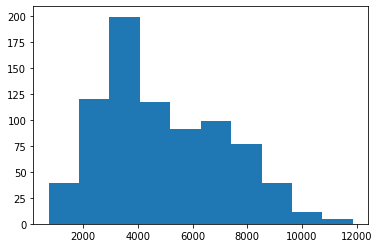